# Assignment 5
Hierarchical Clustering

In [22]:
#Reference: Chapter 16 Cluster Analysis of Book: Data Mining for Business Analytics: Python
#By Shmueli et. al.
# Most codes were taken from the book referenced above and improved upon.
#Step 0
# import required functionality for Cluster Analysis

import matplotlib.pyplot as plt
#import mlba
import pandas as pd
import seaborn as sns
#from adjustText import adjust_text
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise

#Step 1: Data Preprocessing. Remove all cereals with missing values.

In [23]:
Cereals_df = pd.read_csv('Cereals.csv')
Cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


Q2. Apply hierarchical clustering to the data using Euclidean distance to the normalized measurements. Use Agnes to compare the clustering from single linkage, complete linkage, average linkage, and Ward. Choose the best method.

2(a) Writing a code to normalize the data.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

numerical_cols = Cereals_df.columns[4:16]
Cereals_numerical_df = Cereals_df[numerical_cols]

#Normalizing the data
scaler = StandardScaler()
Cereals_normalized = scaler.fit_transform(Cereals_numerical_df)



2 (b) Code for running hierarchical clustering and generating a dendrogram

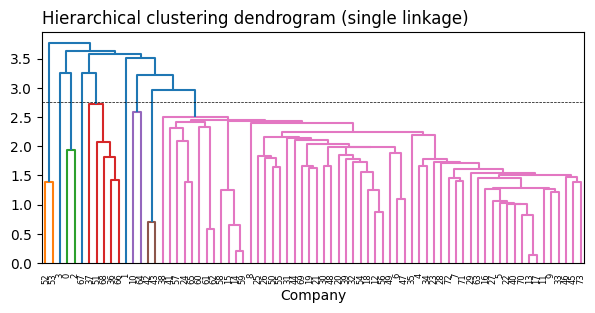

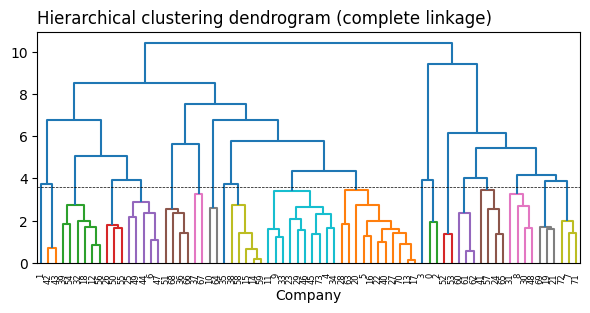

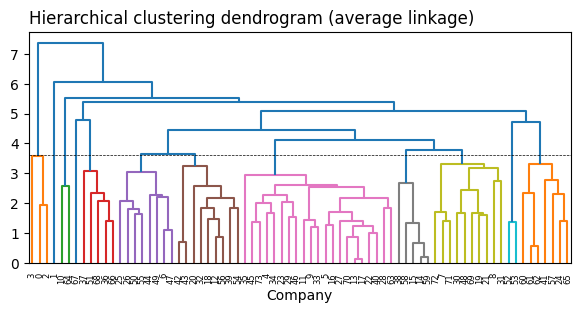

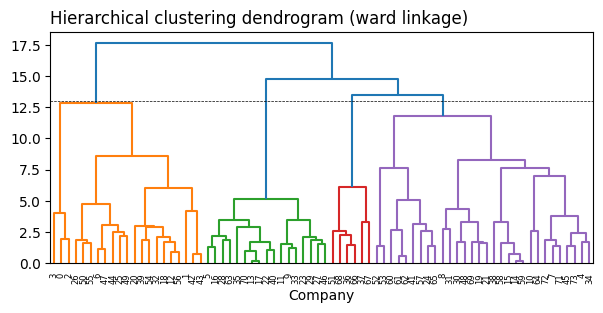

In [25]:
def plot_dendrogram(data, method, color_threshold):
# in linkage() set argument method =
# 'single', 'complete', 'average', 'weighted', centroid', 'median', 'ward'
  Z = linkage(data, method=method)
  fig, ax = plt.subplots(figsize=(7, 3))
  ax.set_title(f'Hierarchical clustering dendrogram ({method} linkage)', loc='left')
  ax.set_xlabel('Company')
  dendrogram(Z, labels=Cereals_df.index, color_threshold=color_threshold, ax=ax)
  ax.axhline(y=color_threshold, color='black', linewidth=0.5, linestyle='dashed')

plot_dendrogram(Cereals_normalized, 'single', 2.75)
plot_dendrogram(Cereals_normalized, 'complete', 3.6)
plot_dendrogram(Cereals_normalized, 'average', 3.6)
plot_dendrogram(Cereals_normalized, 'ward', 13)

2 (c) Discussion:

Single Linkage:Single linkage is giving to many clusters.

Complete Linkage:Complete linkage is better than single linkage giving 4 clusters below the dividing line at 8.

Average Linkage:Average linkage gives 6 clusters for a diving line at 5.

Ward Linkage:Ward Linkage is giving the neatest cluster segregation. It gives 6 clusters for a dividing line at 10. It gives 3 clusters for a dividing line at 13.

Choose the best method: According to the dendograms, the Ward method gives the best dsitinct clusters.


Q3. How many clusters would you choose?

A: I would choose 3 clusters based on the Ward method. We want to see whether the 3 clusters give meaningful results. Whether the segregation is really into good cereals, so-so cereals and bad cereals. That remains to be checked.

Further down in Q5, we see that 6 clusters is giving a better segregation.

Q4. Comment on the structure of the clusters and on their stability. Hint: To check stability, partition the data and see how well clusters formed based on one part apply to the other part.
To do this:
(i) Cluster partition A
(ii) Use the cluster centroids from A to assign each record in partition B (each record is assigned to the cluster with the closest centroid).
(iii) Assess how consistent the cluster assignments are compared to the assignments based on all the data.

Finding the Adjusted Rand Score for Ward Clustering

In [26]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import adjusted_rand_score

trainData, holdoutData = train_test_split(Cereals_normalized, test_size=0.4, random_state=26)

# Ward clustering on trainData and getting cluster assignments
Z_train_ward = linkage(trainData, method='ward')
train_ward_assignments = fcluster(Z_train_ward, t=6, criterion='maxclust')

# Calculating centroids for trainData Ward clusters
ward_cluster_centroids_A = []
for i in range(1, 7): # Assuming 6 clusters (1-indexed from fcluster)
    cluster_points = trainData[train_ward_assignments == i]
    if len(cluster_points) > 0:
        ward_cluster_centroids_A.append(cluster_points.mean(axis=0))
    else:
        # Handle cases where a cluster might be empty
        ward_cluster_centroids_A.append(np.zeros(trainData.shape[1])) # Append a zero vector or handle as appropriate
ward_cluster_centroids_A = np.array(ward_cluster_centroids_A)

print("Ward Cluster Centroids from Partition A:")
print(ward_cluster_centroids_A)

Ward Cluster Centroids from Partition A:
[[ 0.68926626  1.08333333 -0.05917706  0.67138223 -0.22112952  0.41772364
   0.97402882  0.09917021  0.84756563  0.88611761 -0.66186904 -0.15048409]
 [-0.94853155 -1.         -1.97503432 -0.69617892 -0.8355724  -1.64176313
  -0.9377167  -1.31209813  0.94840141 -3.48357296  0.76191901  1.39964824]
 [ 0.22132403 -1.         -1.92941867  0.44634052  0.58734797 -0.94885169
   0.19867693 -0.74759079 -0.86664267 -0.20220332 -0.15642428  1.71281449]
 [-1.22929688 -0.4        -0.00443828 -0.82081741 -0.39576065  1.06059147
  -0.86669209 -0.18308346 -0.62463679 -0.20220332  0.39031033 -0.98908223]
 [-0.01264709 -0.25        0.73149419 -0.38458271  0.97541716 -0.77562384
  -0.51156909  3.20396054  0.94840141 -0.20220332  0.76191901 -0.10692158]
 [ 0.14333366 -0.5         0.69094695 -0.24609551  0.86762016 -0.7563763
  -0.43462577 -0.18308346 -0.56413532 -0.20220332  0.60174285  0.30992385]]


In [27]:
from sklearn.metrics import pairwise_distances_argmin

# Assigning holdoutData using ward_cluster_centroids_A
holdout_ward_assignments_from_A = pairwise_distances_argmin(holdoutData, ward_cluster_centroids_A)

print("\nHoldout Data Ward Cluster Assignments (based on Partition A centroids):")
print(holdout_ward_assignments_from_A)


Holdout Data Ward Cluster Assignments (based on Partition A centroids):
[0 0 3 4 0 5 3 0 3 2 0 3 3 0 3 5 3 2 5 5 0 3 0 3 5 0 5 2 0 2]


In [29]:
#Next let us compare with the full data

# Ward clustering on Cereals_normalized (full dataset)
Z_full_ward = linkage(Cereals_normalized, method='ward')
full_ward_assignments = fcluster(Z_full_ward, t=6, criterion='maxclust')

# Getting the original indices of the Cereals_normalized dataset
original_indices = np.arange(len(Cereals_normalized))

# Re-run train_test_split on the indices to get the holdout indices
# This ensures we get the same split as before (due to random_state=26)
_, holdout_indices = train_test_split(original_indices, test_size=0.4, random_state=26)

# Extracting holdoutData portion from full_ward_assignments
full_data_holdout_ward_assignments = full_ward_assignments[holdout_indices]

print("\nFull Data Ward Cluster Assignments:")
print(full_ward_assignments)

print("\nHoldout Data Ward Cluster Assignments (from Full Data Clustering):")
print(full_data_holdout_ward_assignments)


Full Data Ward Cluster Assignments:
[1 2 1 1 6 3 2 6 6 3 6 3 2 3 6 6 3 3 2 6 2 6 3 3 5 2 2 3 3 3 6 6 2 3 6 3 4
 4 6 2 3 5 2 2 2 6 3 2 6 2 2 4 5 5 2 2 2 5 6 6 5 5 5 3 6 5 4 4 4 6 3 6 6 6]

Holdout Data Ward Cluster Assignments (from Full Data Clustering):
[2 1 6 4 2 6 3 2 3 1 2 3 3 2 3 6 3 5 6 6 2 3 6 6 6 2 6 5 2 5]


In [30]:
# Finally Calculating Adjusted Rand Score for Ward clustering stability
rand_score_ward = adjusted_rand_score(holdout_ward_assignments_from_A, full_data_holdout_ward_assignments)

print(f"\nAdjusted Rand Score for Ward clustering stability: {rand_score_ward:.3f}")


Adjusted Rand Score for Ward clustering stability: 0.632


Adjusted Rand Score for Ward Clustering Stability is 0.632. A 0 score means poor and a 1 score means perfect. So 0.632 is moderately stable.

Q5. The elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet. For this goal, you are requested to find a cluster of “healthy cereals.” Should the data be normalized? If not, how should they be used in the cluster analysis?

Answer: On my first instinct, I thought that the data should be normalized, otherwise it will be over influnced by the disparity between the magnitude of numerical values.

However later down we see that by normalizing the data, we can get negative values for the centroids, which are hard to make sense of.

So, again I tried clustering without the normailization.

First let us start by making a simpler ward diagram showing only the last p clusters with p being 12.

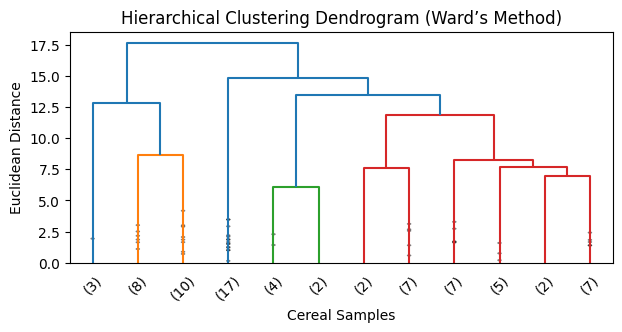

In [31]:
# Apply hierarchical clustering using Ward’s method
Z_ward = linkage(Cereals_normalized, method='ward')

# Plot dendrogram
plt.figure(figsize=(7, 3))
plt.title("Hierarchical Clustering Dendrogram (Ward’s Method)")
plt.xlabel("Cereal Samples")
plt.ylabel("Euclidean Distance")

# Truncate for clarity (last 12 merged clusters)
dendrogram(
    Z_ward,
    truncate_mode="lastp",   # show only the last p merged clusters
    p=12,                    # number of clusters displayed at bottom
    leaf_rotation=45.,       # rotate x-axis labels
    leaf_font_size=10.,      # font size for labels
    show_contracted=True     # show contraction lines
)

plt.show()

So now we have a much simpler dendogram. Let us try to understand the dendogram by looking at the centroids of these dendograms for the values that we are intersted in. We are interested in low sugar, high fiber, and low fat.

In [34]:
# Program to print out the centroid means of clusters with respect to "sugar", "fiber", and "fat".

#First we Convert Cereals_normalized (NumPy array) to a DataFrame
# We use the column names from Cereals_numerical_df to maintain context
Cereals_normalized_df = pd.DataFrame(Cereals_normalized, columns=Cereals_numerical_df.columns)

# Assuming 'full_ward_assignments' contains your cluster labels
# Adding the cluster assignments as a new column to the DataFrame

Cereals_normalized_df['Cluster'] = full_ward_assignments

# Now, calculate the centroids (mean) for 'fiber', 'sugars', and 'fat' per cluster
cluster_centroids = Cereals_normalized_df.groupby('Cluster')[['fiber', 'sugars', 'fat']].mean()
print(cluster_centroids)

            fiber    sugars       fat
Cluster                              
1        3.666168 -0.794871 -0.333333
2        0.388638  0.462635  1.055556
3       -0.757276  1.116296 -0.058824
4       -0.142230 -0.178950 -0.166667
5       -0.026824 -1.102832 -0.888889
6       -0.191690 -0.662888 -0.380952


We are seeing negative values because of normalization. Let us run the code again on the clean data which has not been normalized.

In [38]:
#Running the code on the non normalized raw clean data

Cereals_numerical_df = Cereals_numerical_df.copy()
Cereals_numerical_df['Cluster'] = full_ward_assignments

# Next we calculate the centroids (mean) for 'fiber', 'sugars', and 'fat' per cluster
cluster_centroids = Cereals_numerical_df.groupby('Cluster')[['fiber', 'sugars', 'fat']].mean()

print("Cluster Centroids for Fiber, Sugars, and Fat:")
print(cluster_centroids)

Cluster Centroids for Fiber, Sugars, and Fat:
             fiber     sugars       fat
Cluster                                
1        11.000000   3.666667  0.666667
2         3.111111   9.111111  2.055556
3         0.352941  11.941176  0.941176
4         1.833333   6.333333  0.833333
5         2.111111   2.333333  0.111111
6         1.714286   4.238095  0.619048


We can see that Cluster 5 has low sugar, low fat and relatively high fiber.

Next we want to see, which cereals are listed in cluster 5.

In [39]:
# Creating a DataFrame mapping original cereal names to their cluster assignments
cluster_names_df = pd.DataFrame({
    'Cereal_Name': Cereals_df['name'],
    'Cluster': full_ward_assignments
})

# Next Grouping by cluster and list the cereal names in each cluster
for cluster_id in sorted(cluster_names_df['Cluster'].unique()):
    cereals_in_cluster = cluster_names_df[cluster_names_df['Cluster'] == cluster_id]['Cereal_Name'].tolist()
    print(f"\nCluster {cluster_id} Cereals ({len(cereals_in_cluster)} items):")
    for cereal_name in cereals_in_cluster:
        print(f"- {cereal_name}")


Cluster 1 Cereals (3 items):
- 100%_Bran
- All-Bran
- All-Bran_with_Extra_Fiber

Cluster 2 Cereals (18 items):
- 100%_Natural_Bran
- Basic_4
- Clusters
- Cracklin'_Oat_Bran
- Crispy_Wheat_&_Raisins
- Fruit_&_Fibre_Dates,_Walnuts,_and_Oats
- Fruitful_Bran
- Great_Grains_Pecan
- Life
- Muesli_Raisins,_Dates,_&_Almonds
- Muesli_Raisins,_Peaches,_&_Pecans
- Mueslix_Crispy_Blend
- Nutri-Grain_Almond-Raisin
- Oatmeal_Raisin_Crisp
- Post_Nat._Raisin_Bran
- Quaker_Oat_Squares
- Raisin_Bran
- Raisin_Nut_Bran

Cluster 3 Cereals (17 items):
- Apple_Jacks
- Cap'n'Crunch
- Cinnamon_Toast_Crunch
- Cocoa_Puffs
- Corn_Pops
- Count_Chocula
- Froot_Loops
- Frosted_Flakes
- Fruity_Pebbles
- Golden_Crisp
- Golden_Grahams
- Honey_Graham_Ohs
- Honey-comb
- Lucky_Charms
- Nut&Honey_Crunch
- Smacks
- Trix

Cluster 4 Cereals (6 items):
- Just_Right_Crunchy__Nuggets
- Just_Right_Fruit_&_Nut
- Product_19
- Total_Corn_Flakes
- Total_Raisin_Bran
- Total_Whole_Grain

Cluster 5 Cereals (9 items):
- Frosted_Mini-Whe

So Cluster 5 has (9 items):
- Frosted_Mini-Wheats
- Maypo
- Puffed_Rice
- Puffed_Wheat
- Raisin_Squares
- Shredded_Wheat
- Shredded_Wheat_'n'Bran
- Shredded_Wheat_spoon_size
- Strawberry_Fruit_Wheats

We recommend these cereals for school use.